In [2]:
import numpy as np
from scipy import stats

#numpy 배열
data = np.array([4,5,1,2,7,2,6,7,3])

#평균
a = np.mean(data)
print(a)



4.111111111111111


In [4]:
#중위수
b = np.median(data)
print(b)

4.0


In [5]:
#최빈값
c=stats.mode(data)
print(c[0][0])

2


In [6]:
from statistics import variance, stdev

points = np.array([20,80,90,95,87,89,95,99,97,100,60,70,77,88,89,89,90])

#분산
a=variance(points)
print(a)

374


In [7]:
#표준편차
b=stdev(points)
print(b)

19.339079605813716


In [8]:
c = np.max(points) - np.min(points)
print(c)

80


In [9]:
#최대, 최소값
a = np.max(points)
b = np.min(points)

c= a-b
print(a)
print(b)
print(c)

100
20
80


In [10]:
#백분위
for val in [20, 80, 100]:
    d = np.percentile(points, val)
    print(str(val)+"%",d)

20% 77.6
80% 95.0
100% 100.0


In [11]:
#사분위수

a,b,c = np.percentile(points, [25,50,75])
print(a)
print(b)
print(c)
print(c-a)

80.0
89.0
95.0
15.0


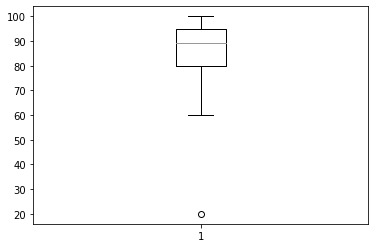

In [12]:
import matplotlib.pyplot as plt

#데이터가 한쪽으로 쏠려있는지 확인하기 위해 시각화한 그래프
#가운데 선은 중위수
#양 끝의 수염은 최솟값과 최대값
#동떨어진 값 1개는 이상치
#박스의 양끝은 각각 75%와 25%를 가리킴
plt.boxplot(points) #상자수염그림
plt.show()

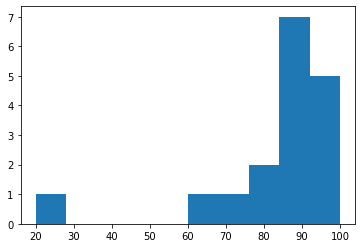

In [13]:
plt.hist(points)
plt.show()

#20점의 경우 이상치로 볼 수 있음
# 이상치는 데이터에 큰 영향을 줄 수 있기 때문에 따로 처리가 필요함(배제)

In [14]:
#귀무가설: 두 데이터의 차이가 없다
#대립가설: 두 데이터의 차이가 있다(내가 주장하고 싶은 가설)
data1 = [4,6,17,16,8,9]
data2 = [10,10,10,10,10,10]
stats.chisquare(data1,data2) #카이제곱검정
# pvalue 0.5 보다 작으므로 대립가설 채택

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [17]:
import pandas as pd
from scipy import stats

survey = pd.read_csv('c:/data/smoke/survey.csv')
#survey
#Smoke와 Exer 필드를 기준으로 집계
data = pd.crosstab(survey.Smoke, survey.Exer)
data



Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [18]:
#카이제곱검정 수행
#귀무가설 : 운동습관과 흡연량은 관계가 없다.
#대립가설 : 운동습관과 흡연량은 관계가 있다.
result = stats.chi2_contingency(observed=data)
print(result[0]) #검정통계량
print(result[1]) #p-value

5.488545890584232
0.48284216946545633


In [20]:
#단일표본 t검정
#전체 학생들 중 20명의 학생들을 선택하여 전체 학생들의 평균키가 175cm인지 아닌지 판단
#귀무가설 : 학생들의 평균키는 175cm
#대립가설 : 학생들의 평균키는 175cm 가 아니다.

import numpy as np
from scipy import stats

#랜덤 시드 설정, 시드를 고정하지 않을 경우 값이 달라짐
np.random.seed(1)

#np.random.normal(0,5) : 평균 0, 표준편차 5인 난수
heights = [180 + np.random.normal(0,5) for a in range(20)]

result = stats.ttest_1samp(heights, 175)
print('검정통계량 : %.3f, p-value : %.3f' % result)
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서
# 학생들의 평균키는 통계적으로 유의하게 차이가 난다고 할 수 있음
# 따라서 대립가설이 옳다.

검정통계량 : 3.435, p-value : 0.003


In [23]:
#귀무가설 : 두 학급의 평균키는 같다.
#대립가설 : 두 학급의 평균키는 다르다.
#독립표본 t검정(2개의 그룹)

group1 = [170+np.random.normal(0,5) for a in range(20)]
group2 = [175+np.random.normal(0,10) for a in range(20)]
print(group1)
print(group2)

stats.ttest_ind(group1, group2)

[166.22801029501673, 176.26434077616645, 172.56464910209004, 168.50953582448642, 172.44259073268748, 169.62214143489473, 175.65814693725713, 177.599084082111, 180.9278770326658, 163.0175183225593, 162.77943097285205, 167.47767068526775, 170.80018534723916, 174.38084460558113, 171.578174736208, 159.88899392087998, 168.46897993685815, 174.13987321303622, 171.15047367682192, 173.81005590156013]
[172.7767185738964, 172.99241931070003, 176.86561390988285, 179.10051647208257, 176.9829972012677, 176.19008645807457, 168.2933771371097, 178.7756378632092, 176.21821270991438, 186.29483907911919, 186.98917879901506, 176.85156417483944, 171.24715049909886, 168.61269592545779, 179.23494354064113, 175.7734006834856, 171.56146324428926, 175.43596856834247, 168.79999156051872, 181.9803203407222]


Ttest_indResult(statistic=-3.117711996238903, pvalue=0.003466277262628802)

In [22]:
#등분산 가정을 하지 않을 경우
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-3.5031868454370456, pvalue=0.0015725905402840974)

In [26]:
#다이어트 약을 복용한 사람들 중 20명을 선택하여 복용 전후의 체중 차이가 유의미한가?
#귀무가설 : 복용 전후의 체중차이 X
#대립가설 : 복용 전후의 체중차이 O
import numpy as np
from scipy import stats

np.random.seed(1)
before=[60 + np.random.normal(0,5) for _ in range(20)]
print('before:', before)

after = [w * np.random.normal(0.99, 0.02) for w in before]
print('after:', after)

result = stats.ttest_rel(before, after)
print(result)
print('검정통계량: %.3f, p-value: %.3f' % result)

before: [68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
after: [65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]
Ttest_relResult(statistic=2.9154993563693186, pvalue=0.008871163766572827)
검정통계량: 2.915, p-value: 0.009


a평균: 79.0
b평균: 65.375
c평균: 64.375
d평균: 69.5


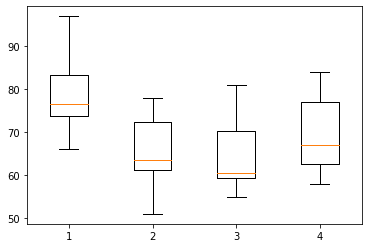

검정통계량: 4.2210931159803815
p-value: 0.013933707427484199


In [31]:
# 아노바분석(일원배치분석)

#A는 4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가함
#신규사원 32명에게 4가지 교육을 임의로 적용
#한달의 훈련기간 후, 표준 시험의 점수는 아래와 같음
# 4개의 교육방법은 성능의 차이가 있는가?
# 3개 이상의 대응표본을 비교해야 하므로, 일원배치 분산분석 기법사용
# 기무가설 : 4개의 교육훈련 기법의 차이 X
# 대립가설 : 차이 O
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#표준 시험 점수
a = [66,74,82,75,73,97,87,78]
b= [72,51,59,62,74,64,78,63]
c= [61,60,57,60,81,55,70,71]
d = [63,61,76,84,58,65,69,80]

#표준 시험의 평균
print('a평균:', np.mean(a))
print('b평균:', np.mean(b))
print('c평균:', np.mean(c))
print('d평균:', np.mean(d))

plot_data = [a,b,c,d]

#수염난상자 모형의 데이터 그래프
ax = plt.boxplot(plot_data)
plt.show()
f, p = stats.f_oneway(a,b,c,d)
print('검정통계량:', f)
print('p-value:', p)

In [33]:
#검정통계량: 표본수, 표본평균 / 표준편차를 이용하여 계산된 값
import pandas as pd
from scipy import stats

# 귀무가설: 세가지 비료의 수확량은 차이가 없다.
# 대립가설: 세가지 비료의 수확량은 차이가 있다.

data = pd.read_csv('c:/data/anova/fertilizers.csv')

print(data)

result = stats.f_oneway(data['fertilizer1'], data['fertilizer2'], data['fertilizer3'])

print(result)
print(result[0])
print(result[1])

   fertilizer1  fertilizer2  fertilizer3
0           72           54           48
1           62           56           62
2           90           58           92
3           42           36           96
4           84           72           92
5           64           34           80
F_onewayResult(statistic=3.7551268418654105, pvalue=0.04762461989261837)
3.7551268418654105
0.04762461989261837
